In [1]:
#import neccesary library
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the dataset
data = pd.read_csv('used_cars_data-1.csv')

#view dataframe
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


In [3]:
#check the structure  of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


####  Based on the above, it can be noticed that the ("Milage","Engine","Power") column are in the object data-type should be an integer. The "price" column name would be changed to "2nd_Hand_Price" for understanding by subsequent user(s) of the data.

### Data Cleaning as stated above

In [4]:
# create a copy of the data before cleaning
data_copy = data.copy()

In [5]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


#### Remove all alphabets in columns("Mileage","Engine","Power") so the data type of the column can be chnaged to integer for better analysis


In [6]:
# create a function

def del_alphabets(value):
    
    '''
    Function to remove alphabets from a column
    '''
    if isinstance(value, str):
        return ''.join(char for char in value if not char.isalpha())
    else:
        return value

In [7]:
# remove all alphabets from column "Mileage"
data_copy["Mileage"] = data_copy["Mileage"].apply(del_alphabets)

In [8]:
data_copy["Mileage"]

0       26.6 /
1       19.67 
2        18.2 
3       20.77 
4        15.2 
         ...  
7248    20.54 
7249    17.21 
7250    23.08 
7251     17.2 
7252     10.0 
Name: Mileage, Length: 7253, dtype: object

#### We can notice that there are some "/" and space within the cells, we would write a formula to remove them

In [9]:
# create a function to remove "/" and spaces from a value
def remove_slash_and_space(value):
    if isinstance(value, str):
        return value.replace("/", "").replace(" ", "")
    else:
        return value


In [10]:
data_copy["Mileage"] = data_copy["Mileage"].apply(remove_slash_and_space)

In [11]:
data_copy["Mileage"]

0        26.6
1       19.67
2        18.2
3       20.77
4        15.2
        ...  
7248    20.54
7249    17.21
7250    23.08
7251     17.2
7252     10.0
Name: Mileage, Length: 7253, dtype: object

In [12]:
# Convert the "Mileage" column to float
data_copy["Mileage"] = pd.to_numeric(data_copy["Mileage"], errors='coerce')

In [13]:
data_copy["Mileage"]

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage, Length: 7253, dtype: float64

In [14]:
# remove all alphabets from column "Engine"
data_copy["Engine"] = data_copy["Engine"].apply(del_alphabets)
data_copy["Engine"]

0        998 
1       1582 
2       1199 
3       1248 
4       1968 
        ...  
7248    1598 
7249    1197 
7250    1461 
7251    1197 
7252    2148 
Name: Engine, Length: 7253, dtype: object

In [15]:
# Convert the "object" column to numeric, handling non-convertible values with NaN
data_copy['Engine'] = pd.to_numeric(data_copy['Engine'], errors='coerce')



data_copy["Engine"]

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine, Length: 7253, dtype: float64

In [16]:
# Convert non-NaN values to integers and replace NaN values to "0"
data_copy['Engine'] = data_copy['Engine'].fillna(0).astype(int)


data_copy["Engine"]

0        998
1       1582
2       1199
3       1248
4       1968
        ... 
7248    1598
7249    1197
7250    1461
7251    1197
7252    2148
Name: Engine, Length: 7253, dtype: int32

### Cleaning the "Power" column

In [17]:
data_copy["Power"] = data_copy["Power"].apply(del_alphabets)

data_copy["Power"]

0       58.16 
1       126.2 
2        88.7 
3       88.76 
4       140.8 
         ...  
7248    103.6 
7249    103.6 
7250     63.1 
7251    103.6 
7252      170 
Name: Power, Length: 7253, dtype: object

In [18]:
# Convert the "Power" column to float
data_copy["Power"] = pd.to_numeric(data_copy["Power"], errors='coerce')

data_copy["Power"]

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
7248    103.60
7249    103.60
7250     63.10
7251    103.60
7252    170.00
Name: Power, Length: 7253, dtype: float64

### Change the column name for the target variable

In [19]:
data_copy.rename(columns={'Price': '2nd_Hand_Price'}, inplace=True)

In [20]:
# Check the updated structure of the data
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7253 non-null   int32  
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  2nd_Hand_Price     6019 non-null   float64
dtypes: float64(5), int32(1), int64(3), object(5)
memory usage: 765.1+ KB


In [21]:
#check for missing values
data_copy.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                 175
Seats                  53
New_Price               0
2nd_Hand_Price       1234
dtype: int64

### The following columns have mssing values, "Mileage (2)", "Power (175)"Seats (53)" & "2nd_Hand_Price" (1234)

#### Missing values in all columns would be dropped

#### Drop all  missing values in the data set

In [22]:
# drop all rows with missing values
data_copy.dropna(inplace=True)

In [23]:
#check for missing values
data_copy.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
2nd_Hand_Price       0
dtype: int64

In [24]:
data_copy.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,2nd_Hand_Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,53.14,17.74


#### Descriptive Analysis of all Variables

Text(0.5, 1.0, 'Name of Cars')

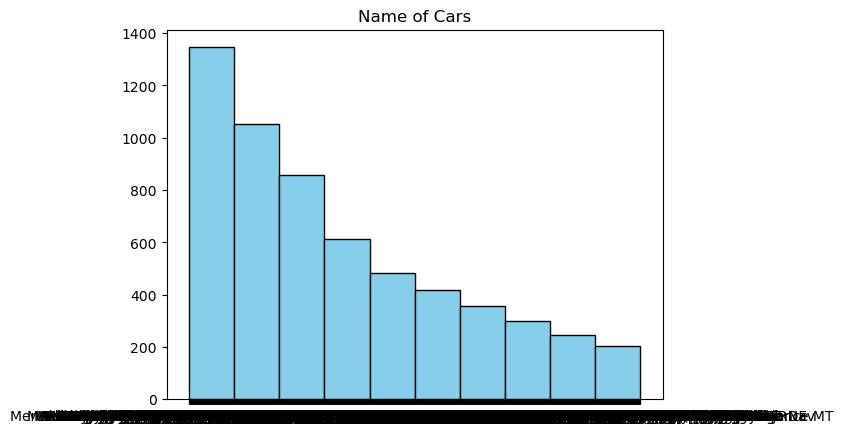

In [25]:
plt.hist(data_copy['Name'], color='skyblue', edgecolor='black',)
plt.title("Name of Cars")

Text(0.5, 1.0, 'Location of Cars')

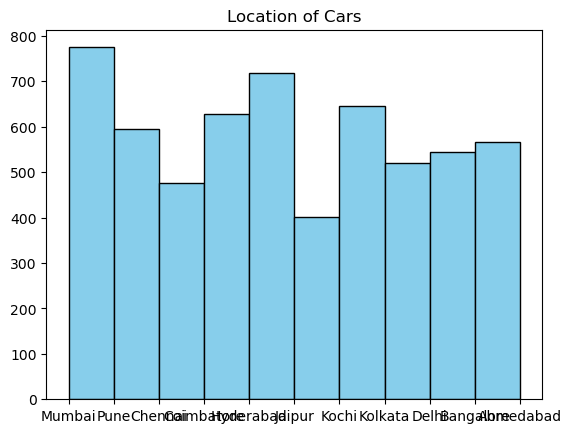

In [26]:
plt.hist(data_copy['Location'], color='skyblue', edgecolor='black',)
plt.title("Location of Cars")

Text(0.5, 1.0, 'Year of Manufacture')

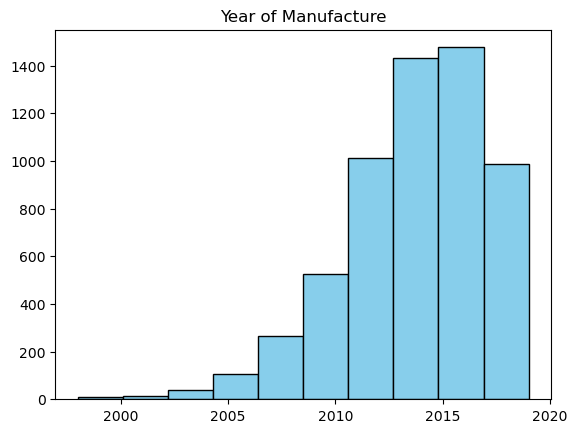

In [27]:
plt.hist(data_copy['Year'], color='skyblue', edgecolor='black',)
plt.title("Year of Manufacture")

Text(0.5, 1.0, 'Total Km driven')

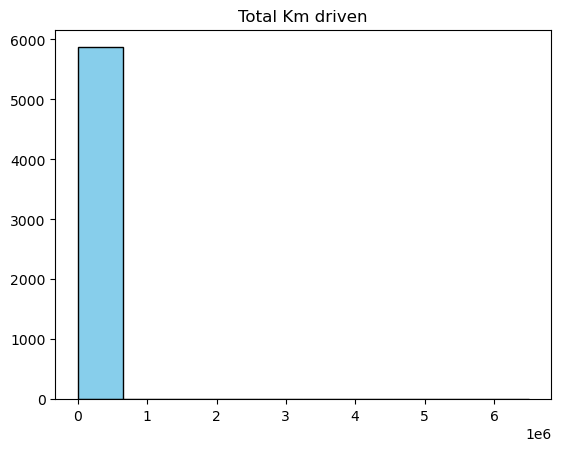

In [28]:
plt.hist(data_copy['Kilometers_Driven'], color='skyblue', edgecolor='black',)
plt.title("Total Km driven")

Text(0.5, 1.0, 'Car Fuel Type')

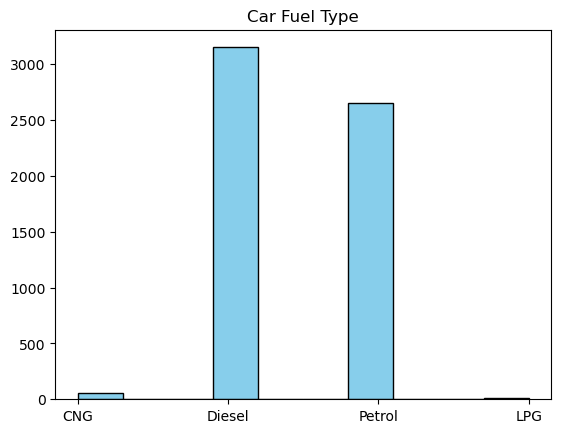

In [29]:
plt.hist(data_copy['Fuel_Type'], color='skyblue', edgecolor='black',)
plt.title("Car Fuel Type")

Text(0.5, 1.0, 'Gear Tranmission')

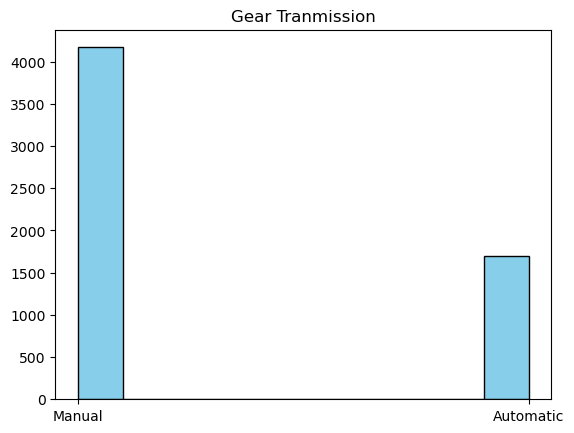

In [30]:
plt.hist(data_copy['Transmission'], color='skyblue', edgecolor='black',)
plt.title("Gear Tranmission")

Text(0.5, 1.0, 'Ownsership Status')

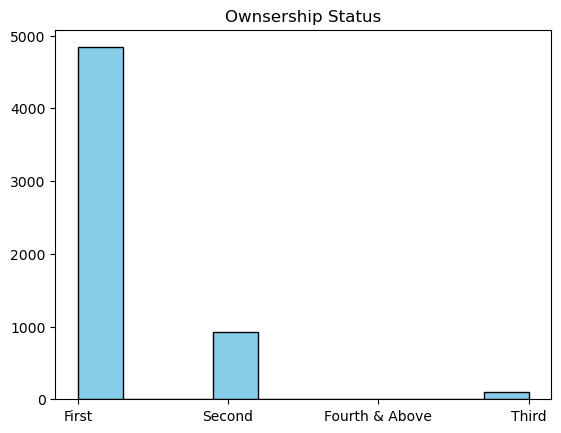

In [31]:
plt.hist(data_copy['Owner_Type'], color='skyblue', edgecolor='black',)
plt.title("Ownsership Status")

Text(0.5, 1.0, 'Total Mileage')

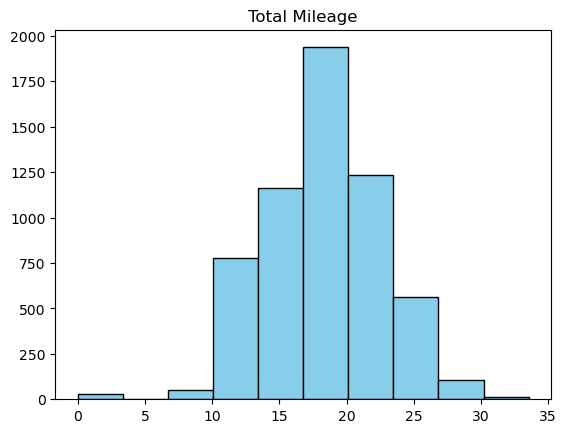

In [32]:
plt.hist(data_copy['Mileage'], color='skyblue', edgecolor='black',)
plt.title("Total Mileage")

Text(0.5, 1.0, 'Car Engine')

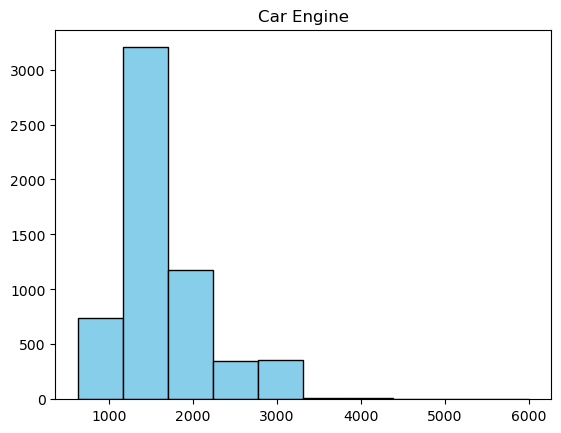

In [33]:
plt.hist(data_copy['Engine'], color='skyblue', edgecolor='black',)
plt.title("Car Engine")

Text(0.5, 1.0, 'Engine Power')

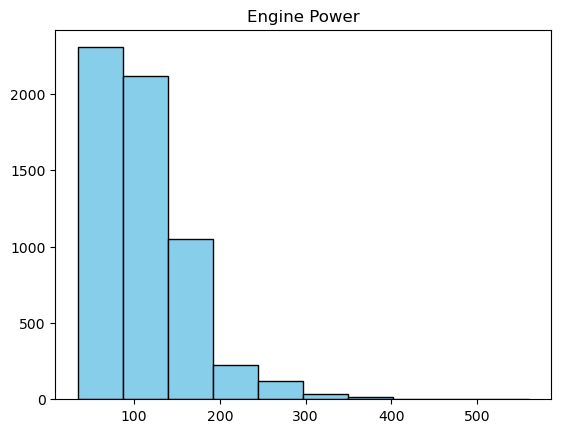

In [34]:
plt.hist(data_copy['Power'], color='skyblue', edgecolor='black',)
plt.title("Engine Power")

Text(0.5, 1.0, 'Number of Seats')

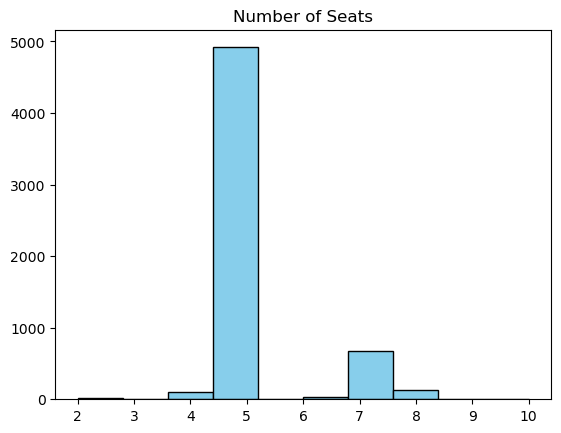

In [35]:
plt.hist(data_copy['Seats'], color='skyblue', edgecolor='black',)
plt.title("Number of Seats")

Text(0.5, 1.0, 'Price of New Car')

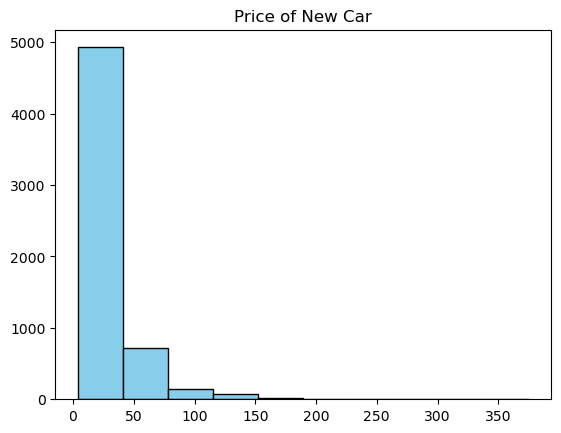

In [36]:
plt.hist(data_copy['New_Price'], color='skyblue', edgecolor='black',)
plt.title("Price of New Car")

Text(0.5, 1.0, 'Price of Used Car')

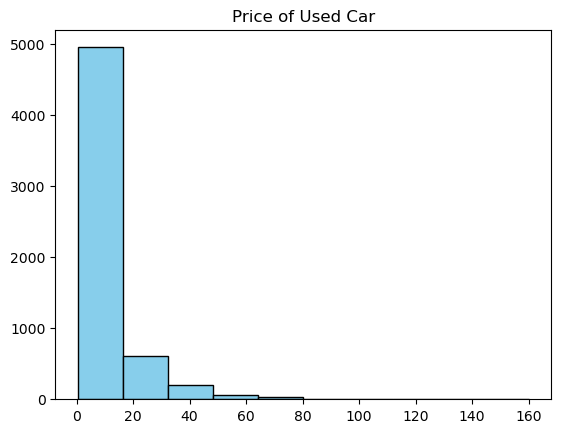

In [37]:
plt.hist(data_copy['2nd_Hand_Price'], color='skyblue', edgecolor='black',)
plt.title("Price of Used Car")

#### Most of the variables are not normally distributed except for the "Mileage" column. We would need to tranform all the independent and dependent variable

##

### Create  plots to determine the relationship between the traget variable and feature variables.

Text(0.5, 1.0, 'Car Name vs 2nd_Hand_Price')

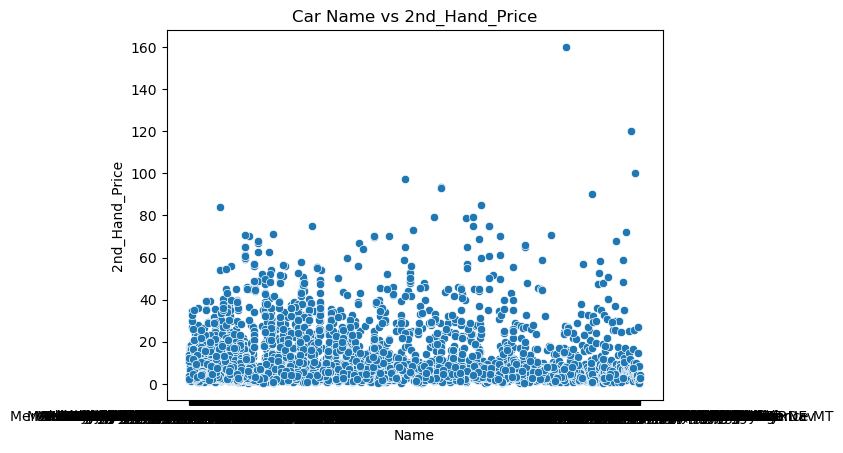

In [38]:
sns.scatterplot(data = data_copy, x = 'Name', y = '2nd_Hand_Price')
plt.title ("Car Name vs 2nd_Hand_Price")

Text(0.5, 1.0, 'Car Location vs 2nd_Hand_Price')

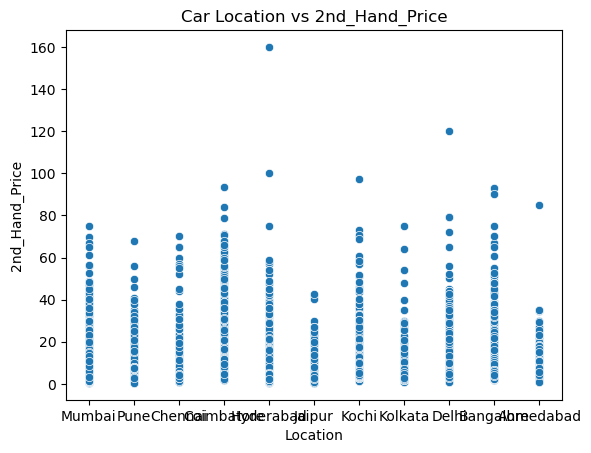

In [39]:
sns.scatterplot(data = data_copy, x = 'Location', y = '2nd_Hand_Price')
plt.title ("Car Location vs 2nd_Hand_Price")

Text(0.5, 1.0, 'Year of Manufacture vs 2nd_Hand_Price')

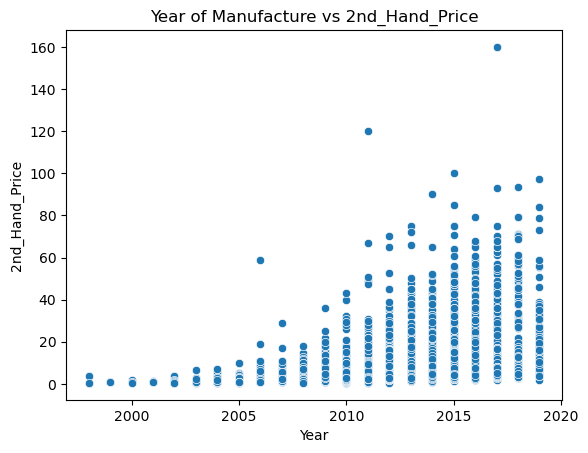

In [40]:
sns.scatterplot(data = data_copy, x = 'Year', y = '2nd_Hand_Price')
plt.title ("Year of Manufacture vs 2nd_Hand_Price")

Text(0.5, 1.0, 'Total Kilometers Driven vs 2nd_Hand_Price')

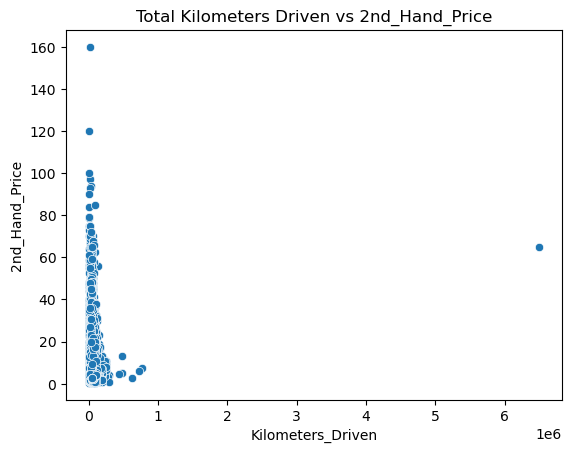

In [41]:
sns.scatterplot(data = data_copy, x = 'Kilometers_Driven', y = '2nd_Hand_Price')
plt.title ("Total Kilometers Driven vs 2nd_Hand_Price")

Text(0.5, 1.0, 'Car Fuel Type vs 2nd_Hand_Price')

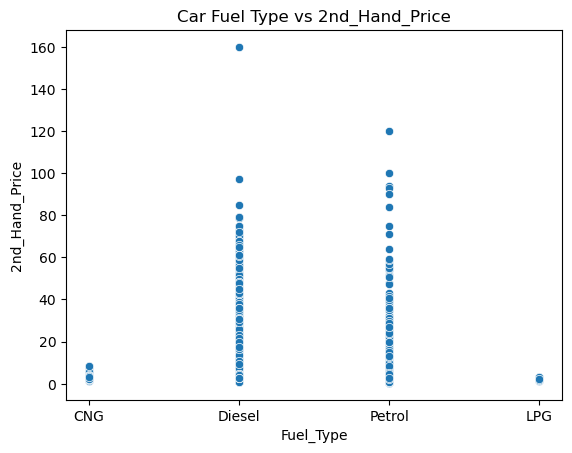

In [42]:
sns.scatterplot(data = data_copy, x = 'Fuel_Type', y = '2nd_Hand_Price')
plt.title ("Car Fuel Type vs 2nd_Hand_Price")

Text(0.5, 1.0, 'Gear Tranmission vs 2nd_Hand_Price')

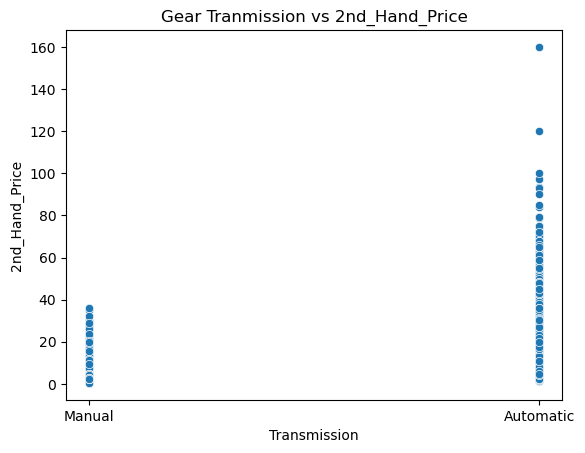

In [43]:
sns.scatterplot(data = data_copy, x = 'Transmission', y = '2nd_Hand_Price')
plt.title ("Gear Tranmission vs 2nd_Hand_Price")

Text(0.5, 1.0, 'Ownership Statusvs 2nd_Hand_Price')

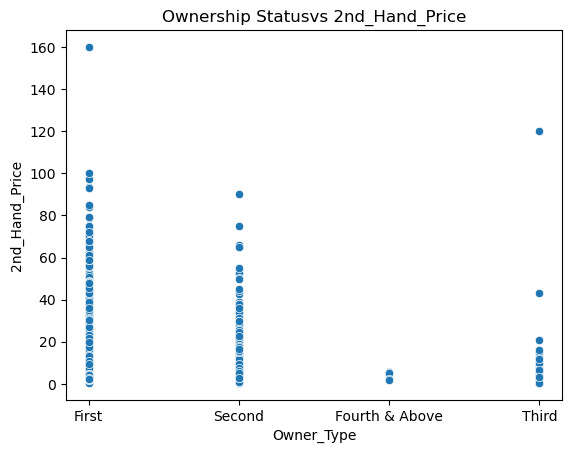

In [44]:
sns.scatterplot(data = data_copy, x = 'Owner_Type', y = '2nd_Hand_Price')
plt.title ("Ownership Statusvs 2nd_Hand_Price")

Text(0.5, 1.0, 'Total Mileage vs 2nd_Hand_Price')

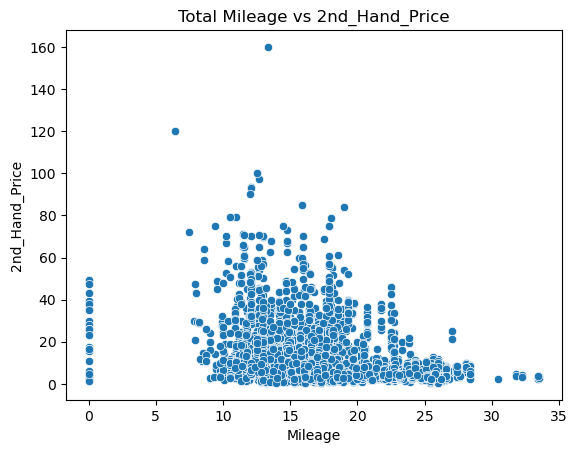

In [45]:
sns.scatterplot(data = data_copy, x = 'Mileage', y = '2nd_Hand_Price')
plt.title ("Total Mileage vs 2nd_Hand_Price")

Text(0.5, 1.0, 'Car Engine vs 2nd_Hand_Price')

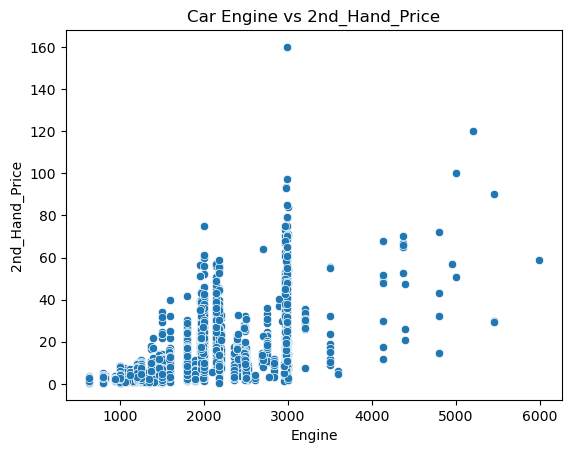

In [46]:
sns.scatterplot(data = data_copy, x = 'Engine', y = '2nd_Hand_Price')
plt.title ("Car Engine vs 2nd_Hand_Price")

Text(0.5, 1.0, 'Engine Power vs 2nd_Hand_Price')

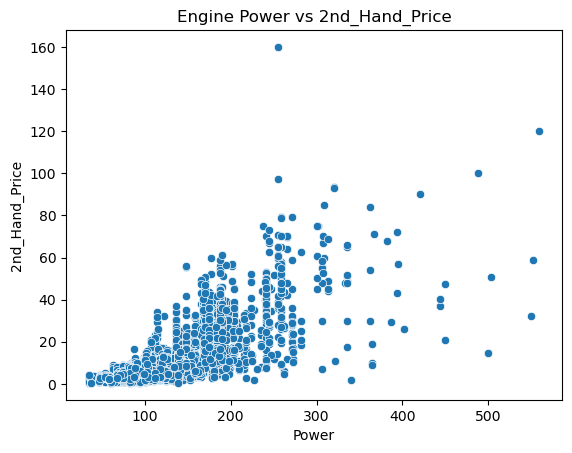

In [47]:
sns.scatterplot(data = data_copy, x = 'Power', y = '2nd_Hand_Price')
plt.title ("Engine Power vs 2nd_Hand_Price")

Text(0.5, 1.0, 'Car Seats vs 2nd_Hand_Price')

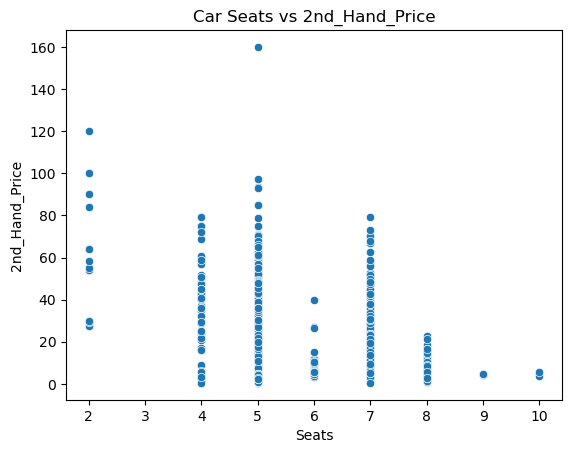

In [48]:
sns.scatterplot(data = data_copy, x = 'Seats', y = '2nd_Hand_Price')
plt.title ("Car Seats vs 2nd_Hand_Price")

In [49]:
data_copy.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', '2nd_Hand_Price'],
      dtype='object')

Text(0.5, 1.0, 'Price of New Car vs 2nd_Hand_Price')

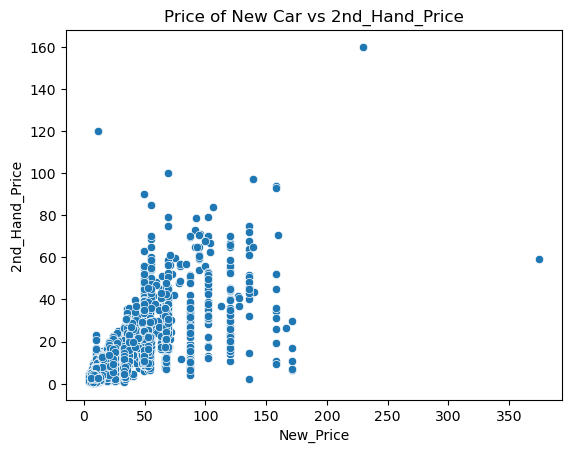

In [50]:
sns.scatterplot(data = data_copy, x = 'New_Price', y = '2nd_Hand_Price')
plt.title ("Price of New Car vs 2nd_Hand_Price")

# Determine the correlation matrix

In [51]:
# drop "New_Price" column

data_copy.drop(['New_Price','S.No.'],axis=1, inplace=True)

In [52]:
num_data = data_copy.select_dtypes(include = ["int", "float"])

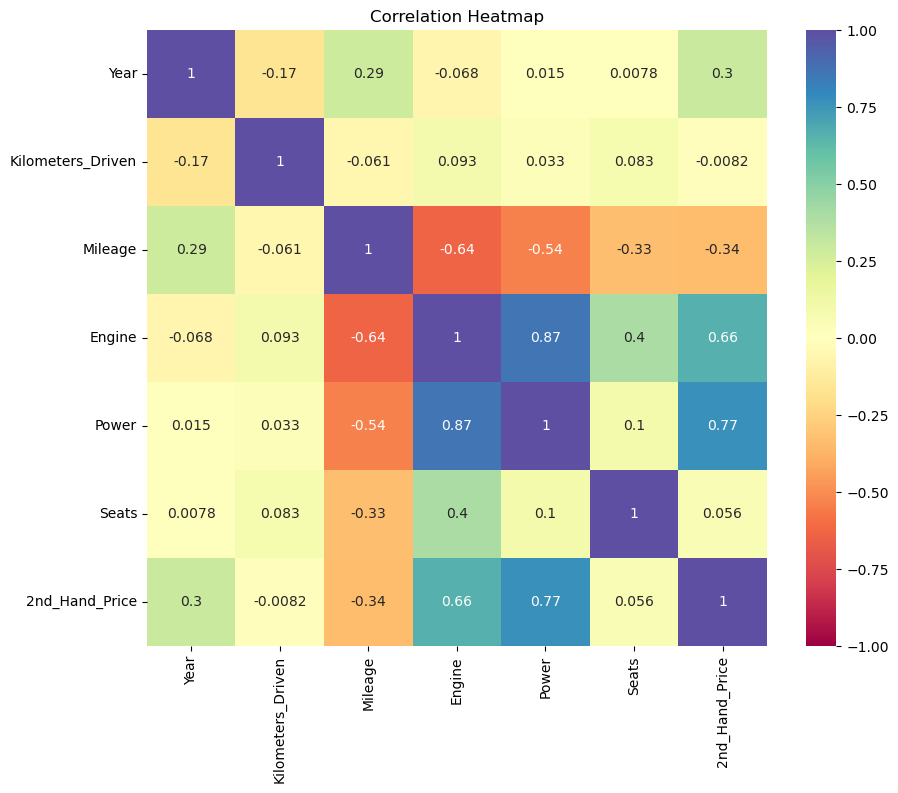

In [53]:
# plot the correlation matrix
data_corr = num_data.corr()
# Set the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data_corr, annot=True, cmap='Spectral', vmin= -1, vmax= 1)
plt.title('Correlation Heatmap')
plt.show()

### The above correlation matrix shows there are no serious case of multi-colinearity except that of "Power" & "New_price", the New_Price & Name column would be dropped from the dataset before the model is created

### Linear Regression Model

In [54]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int32  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  2nd_Hand_Price     5872 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 573.4+ KB


In [55]:
# check values of all columns in the dataset
unique_counts = data_copy.nunique()

# Print or display the result
print("Unique Counts in the Dataset:")
print(unique_counts)

Unique Counts in the Dataset:
Name                 1811
Location               11
Year                   22
Kilometers_Driven    3038
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               429
Engine                139
Power                 368
Seats                   8
2nd_Hand_Price       1364
dtype: int64


## One-Hot Encoding for non-numerical columns

In [56]:
# perform one-hot encoding for 3 columns
data_copy_en = pd.get_dummies(data_copy, columns=['Fuel_Type','Transmission','Owner_Type'])

data_copy_en

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,2nd_Hand_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.60,998,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67,1582,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,18.20,1199,88.70,5.0,4.50,0,0,0,1,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.20,1968,140.80,5.0,17.74,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,28.40,1248,74.00,5.0,4.75,0,1,0,0,0,1,1,0,0,0
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,24.40,1120,71.00,5.0,4.00,0,1,0,0,0,1,1,0,0,0
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,14.00,2498,112.00,8.0,2.90,0,1,0,0,0,1,0,0,1,0
6017,Maruti Wagon R VXI,Kolkata,2013,46000,18.90,998,67.10,5.0,2.65,0,0,0,1,0,1,1,0,0,0


In [57]:
#Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.
# classify independent variable to "X" and target variable to "y"

X = data_copy_en.drop(['2nd_Hand_Price','Name', 'Location'],axis= 1)
y = data_copy_en['2nd_Hand_Price']


In [58]:
#convert the target variable using the logarithm exploration
y_transformed = np.log(y)

In [59]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [60]:
#splitting the data into 70:30 ratio for train and test sets
X_train, X_test, y_train_transformed, y_test_transformed = train_test_split(X, y_transformed, test_size=0.3, random_state=18)

In [61]:
# re-scale the independent variables 

# define the StandardScaler
scaler = StandardScaler()
# fit and transform all independent variables ("X")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
X_train_scaled

array([[-0.78041437,  1.01052074, -1.21577928, ..., -0.03490024,
        -0.43580354, -0.12068266],
       [-0.46315393,  0.57799862, -1.25971451, ..., -0.03490024,
        -0.43580354, -0.12068266],
       [ 0.17136695, -0.02377129,  1.07578969, ..., -0.03490024,
        -0.43580354, -0.12068266],
       ...,
       [-0.14589349, -0.11563522,  0.36126415, ..., -0.03490024,
        -0.43580354, -0.12068266],
       [-1.09767482,  0.34293225, -0.28851475, ..., -0.03490024,
         2.29461193, -0.12068266],
       [-1.09767482, -0.29676797,  0.48844507, ..., -0.03490024,
        -0.43580354, -0.12068266]])

In [63]:
print(f" Test Shape: {X_test_scaled.shape}")
print(f" Train Shape: {X_train_scaled.shape}")

 Test Shape: (1762, 16)
 Train Shape: (4110, 16)


### Fit the model to the training set

In [64]:
# import the Linear Regression algorithm
from sklearn.linear_model import LinearRegression

In [65]:
#create an instance for the Linear Regression algorithm
lin_reg = LinearRegression()
# fit the model
actual = lin_reg.fit(X_train_scaled, y_train_transformed)

print(actual)

LinearRegression()


In [66]:
# determine model coefficients
lin_reg.coef_

array([ 0.40392368, -0.00222333, -0.09327307,  0.06640717,  0.40535961,
       -0.00165787, -0.00124624,  0.08796529, -0.00249628, -0.08768761,
        0.0731501 , -0.0731501 ,  0.00813115,  0.00390627, -0.00637925,
       -0.00748748])

In [67]:
# define the predicted X test values
y_predict = lin_reg.predict(X_test_scaled)

In [68]:
y_predict.shape

(1762,)

In [69]:
from sklearn.metrics import r2_score
r2_value = r2_score(y_test_transformed, y_predict)

print("R-squared score:", r2_value)

R-squared score: 0.8767940851430027


### The aboveR-squared score  shows  that 87.68% of the variance in the dependent variable is explained by the independent variables in the model

In [70]:
# import the algorithm

from sklearn.metrics import mean_squared_error

In [71]:
# using the Mean Square Error Method to derive the score of the test data set
mse = mean_squared_error(y_test_transformed, y_predict)
print("Mean Squared Error (MSE) is :", mse)

Mean Squared Error (MSE) is : 0.09320351036934353


### The above computation shows a relatively small error on average, it also suggests that the model's predictions are relatively close to the actual values

In [72]:
# Calculate RMSE using the values above
mse = mean_squared_error(y_test_transformed, y_predict)
rmse_score = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) is :", rmse_score)

Root Mean Squared Error (RMSE) is : 0.3052924996938895


### The above also suggests a relatively small error on average, It suggests that the model's predictions are relatively close to the actual values in the original scale of the target variable

###  Fit test data in the model


In [74]:
#create an instance for the Linear Regression algorithm
lin_reg = LinearRegression()
# fit the model for the test data set
actual = lin_reg.fit(X_test_scaled, y_test_transformed)

print(actual)

LinearRegression()


In [75]:
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Coefficients: [ 3.81406641e-01 -8.69158057e-02 -8.81366098e-02  3.59489860e-02
  4.62741758e-01  2.35381311e-02 -6.25538363e-03  8.24259205e-02
  1.12996252e-03 -8.15198523e-02  6.96851991e-02 -6.96851991e-02
  2.11239071e-02  1.75334951e-04 -1.59241252e-02 -1.85259975e-02]
Intercept: 1.8524278268658756


In [73]:
columns_list = X.columns.tolist()
print("List of all columns:", columns_list)

List of all columns: ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third']


In [77]:
#printing coefficients against their respective features

feature_names = X.columns
coefficients = lin_reg.coef_

In [81]:
# Print the coefficients for each feature
coefficients_data_copy = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})




print(coefficients_data_copy)

                      Feature  Coefficient
0                        Year     0.381407
1           Kilometers_Driven    -0.086916
2                     Mileage    -0.088137
3                      Engine     0.035949
4                       Power     0.462742
5                       Seats     0.023538
6               Fuel_Type_CNG    -0.006255
7            Fuel_Type_Diesel     0.082426
8               Fuel_Type_LPG     0.001130
9            Fuel_Type_Petrol    -0.081520
10     Transmission_Automatic     0.069685
11        Transmission_Manual    -0.069685
12           Owner_Type_First     0.021124
13  Owner_Type_Fourth & Above     0.000175
14          Owner_Type_Second    -0.015924
15           Owner_Type_Third    -0.018526
